<a href="https://colab.research.google.com/github/nk876664-alpha/Movie_Review/blob/main/Defense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# To fix the FileNotFoundError, please upload your 'Banglastopword.txt' file.
# You can do this by clicking the folder icon on the left sidebar (File Browser),
# then clicking the 'Upload' icon (looks like an upward arrow) and selecting your file.
# Make sure the file is uploaded directly into the /content/ directory.

# Alternatively, if you want to create an empty stopword file to proceed without stopwords for now, run the following line:
# with open('/content/Banglastopword.txt', 'w', encoding='utf-8') as f:
#     pass # Creates an empty file

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
mr = pd.read_excel('/content/Movie_Reviews DataSet.xlsx')

In [ ]:
mr.shape

(5000, 2)

In [ ]:
mr.isnull().sum()

,0
Movie Review,1
Sentiment,1


In [ ]:
mr.fillna('Bu')

,Movie Review,Sentiment
0,"আমার শৈশবের দেখা ছবি, আবার দেখলাম, তাও আবার দী...",1.0
1,অসাধারন একটা মুভি আমি কখনো কোনো বাংলা মুভি দেখ...,1.0
2,ছোটবেলায় এই ছবিটি হলে গিয়ে দেখেছিলাম।কোনো দৃশ্...,1.0
3,এতো সুন্দর সিনেমা। দেখেই মন টা ভরে গেলো। মনে হ...,1.0
4,মুভিটা অনেক ভালো লেগেছে। তবে এই প্রথম আনোয়ার ...,1.0
...,...,...
4995,সিনেমাটির গল্পের রূপকাঠামো বেশ সরল এবং বোঝার জ...,2.0
4996,"গল্প বাস্তবধর্মী, পুরোপুরি বাস্তব না।",2.0
4997,"সিনেমার শুরুটা ধীর, কিন্তু গল্পের প্রারম্ভিক ধ...",2.0
4998,"চরিত্রগুলোর অভিনয় মোটামুটি, কেউ অতিরিক্ত ভালো...",2.0


In [ ]:
mr.head(6)

,Movie Review,Sentiment
0,"আমার শৈশবের দেখা ছবি, আবার দেখলাম, তাও আবার দী...",1.0
1,অসাধারন একটা মুভি আমি কখনো কোনো বাংলা মুভি দেখ...,1.0
2,ছোটবেলায় এই ছবিটি হলে গিয়ে দেখেছিলাম।কোনো দৃশ্...,1.0
3,এতো সুন্দর সিনেমা। দেখেই মন টা ভরে গেলো। মনে হ...,1.0
4,মুভিটা অনেক ভালো লেগেছে। তবে এই প্রথম আনোয়ার ...,1.0
5,অসাধারণ একটি ছবি। ধন্যবাদ,1.0


In [ ]:
mr.tail(10)

,Movie Review,Sentiment
4990,"গানের সংখ্যা কম, গল্পে বাধা দেয়নি।",2.0
4991,"গল্পের পেস কখনো খুব দ্রুত নয়, আবার খুব ধীরও ন...",2.0
4992,থ্রিলার বা সাসপেন্স সীমিত।,2.0
4993,"চরিত্রগুলোর অভিনয় স্বাভাবিক, কেউ অতিরিক্ত প্র...",2.0
4994,"চরিত্র বিকাশ গভীর নয়, প্রয়োজনীয় পর্যায়ে।",2.0
4995,সিনেমাটির গল্পের রূপকাঠামো বেশ সরল এবং বোঝার জ...,2.0
4996,"গল্প বাস্তবধর্মী, পুরোপুরি বাস্তব না।",2.0
4997,"সিনেমার শুরুটা ধীর, কিন্তু গল্পের প্রারম্ভিক ধ...",2.0
4998,"চরিত্রগুলোর অভিনয় মোটামুটি, কেউ অতিরিক্ত ভালো...",2.0
4999,মুভিটা একবার দেখার মতো। গল্পটা খুব শক্তিশালী ন...,2.0


In [ ]:
mr.columns

Index(['Movie Review', 'Sentiment'], dtype='object')

In [ ]:
mr.dropna()

,Movie Review,Sentiment
0,"আমার শৈশবের দেখা ছবি, আবার দেখলাম, তাও আবার দী...",1.0
1,অসাধারন একটা মুভি আমি কখনো কোনো বাংলা মুভি দেখ...,1.0
2,ছোটবেলায় এই ছবিটি হলে গিয়ে দেখেছিলাম।কোনো দৃশ্...,1.0
3,এতো সুন্দর সিনেমা। দেখেই মন টা ভরে গেলো। মনে হ...,1.0
4,মুভিটা অনেক ভালো লেগেছে। তবে এই প্রথম আনোয়ার ...,1.0
...,...,...
4995,সিনেমাটির গল্পের রূপকাঠামো বেশ সরল এবং বোঝার জ...,2.0
4996,"গল্প বাস্তবধর্মী, পুরোপুরি বাস্তব না।",2.0
4997,"সিনেমার শুরুটা ধীর, কিন্তু গল্পের প্রারম্ভিক ধ...",2.0
4998,"চরিত্রগুলোর অভিনয় মোটামুটি, কেউ অতিরিক্ত ভালো...",2.0


In [ ]:
mr.dtypes

,0
Movie Review,object
Sentiment,float64


In [ ]:
mr.describe()

,Sentiment
count,4999.000000
mean,1.001000
std,0.816863
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [ ]:
import os
columns_to_shuffled = ['Movie Review', 'Sentiment']
shuffled_mr = mr.sample(frac=1).reset_index(drop=True)
shuffled_mr = pd.concat([shuffled_mr.drop(columns=columns_to_shuffled), shuffled_mr],axis=1)
shuffled_mr.dropna(inplace=True)
shuffled_mr.to_excel("/content/Movie_Reviews DataSet (1).xlsx", index=False)
print(shuffled_mr)

                                           Movie Review  Sentiment
0                গল্পের কোনো উত্তেজনা নেই—একদম ফ্ল্যাট।        0.0
1     ভিলেন চরিত্র সীমিত প্রভাবশালী, গল্পে প্রয়োজনীয়।        2.0
2                           চরিত্রগুলোর কেমিস্ট্রি নেই।        0.0
3     সিনেমার প্রোডাকশন মান ভালো, ভিজ্যুয়াল ঠিক আছে...        2.0
4     গল্পের চরিত্রগুলোর গভীরতা নেই, দর্শক সংযোগ করত...        0.0
...                                                 ...        ...
4995     সিনেমার গল্পটা ছিল সাধারণ, কোনো জটিলতা ছিল না।        2.0
4996  মুভিটা দেখলে আসলে কান্না চলে আসে বাংলার শ্রেষ্...        1.0
4997            ফারিয়া দেশের কালচারটা নষ্ট  করে দিচ্ছে         0.0
4998  সত্যি অসাধারণ একটা মুভি। অমর সানি, বাপ্পারাজের...        1.0
4999  হাজার বছর ধরে আমার দেখা বাংলাদেশের শ্রেষ্ঠ সিন...        1.0

[4998 rows x 2 columns]


In [ ]:
shuffled_mr.isnull().sum()

,0
Movie Review,0
Sentiment,0


In [ ]:
convert_dict = {
    'Movie Review': str,  # Use the actual column name 'Movie Review' with space
    'Sentiment': int
}

shuffled_mr = shuffled_mr.astype(convert_dict)
shuffled_mr


,Movie Review,Sentiment
0,গল্পের কোনো উত্তেজনা নেই—একদম ফ্ল্যাট।,0
1,"ভিলেন চরিত্র সীমিত প্রভাবশালী, গল্পে প্রয়োজনীয়।",2
2,চরিত্রগুলোর কেমিস্ট্রি নেই।,0
3,"সিনেমার প্রোডাকশন মান ভালো, ভিজ্যুয়াল ঠিক আছে...",2
4,"গল্পের চরিত্রগুলোর গভীরতা নেই, দর্শক সংযোগ করত...",0
...,...,...
4995,"সিনেমার গল্পটা ছিল সাধারণ, কোনো জটিলতা ছিল না।",2
4996,মুভিটা দেখলে আসলে কান্না চলে আসে বাংলার শ্রেষ্...,1
4997,ফারিয়া দেশের কালচারটা নষ্ট করে দিচ্ছে,0
4998,"সত্যি অসাধারণ একটা মুভি। অমর সানি, বাপ্পারাজের...",1


In [ ]:
shuffled_mr['Sentiment'].value_counts()

,count
Sentiment,
2,1670
0,1664
1,1664


In [ ]:
shuffled_mr = shuffled_mr.drop_duplicates(subset=['Movie Review','Sentiment'])

In [ ]:
shuffled_mr['Movie Review'].value_counts()

,count
Movie Review,
হাজার বছর ধরে আমার দেখা বাংলাদেশের শ্রেষ্ঠ সিনেমা আবহমান বাংলার রূপবৈচিত্র গ্রামীণ জীবন সবকিছু ফুটে উঠেছিলো এই সিনেমায়,1
গল্পের কোনো উত্তেজনা নেই—একদম ফ্ল্যাট।,1
"ভিলেন চরিত্র সীমিত প্রভাবশালী, গল্পে প্রয়োজনীয়।",1
চরিত্রগুলোর কেমিস্ট্রি নেই।,1
"সিনেমার প্রোডাকশন মান ভালো, ভিজ্যুয়াল ঠিক আছে। গল্প সাধারণ, মিউজিক ঠিকঠাক।",1
...,...
"ছবির গতি কখনো দ্রুত, কখনো ধীর।",1
"জারা থ্রিলার মুভি পছন্দ করেন,তারা এই মুভিটি দেখতে পারেন",1
সিনেমা দেখে বিশেষ কোনো প্রতিক্রিয়া হয়নি।,1


In [ ]:
shuffled_mr.isnull().sum()

,0
Movie Review,0
Sentiment,0


<Axes: ylabel='Frequency'>

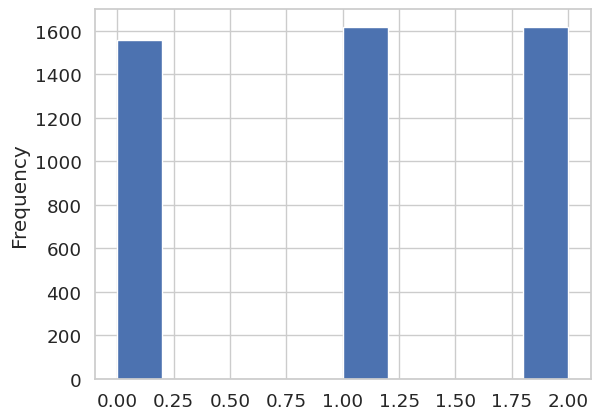

In [ ]:
shuffled_mr['Sentiment'].plot.hist()

In [ ]:
import string
def remove_punc(s):
  table = str.maketrans({key: None for key in string.punctuation})
  return s.translate(table)

In [ ]:
x=shuffled_mr['Movie Review'].apply(remove_punc)
x.shape

(4794,)

In [ ]:
x = shuffled_mr['Movie Review'].fillna('')
y = shuffled_mr['Sentiment']
print(x.head())
print(y.head())

0               গল্পের কোনো উত্তেজনা নেই—একদম ফ্ল্যাট।
1    ভিলেন চরিত্র সীমিত প্রভাবশালী, গল্পে প্রয়োজনীয়।
2                          চরিত্রগুলোর কেমিস্ট্রি নেই।
3    সিনেমার প্রোডাকশন মান ভালো, ভিজ্যুয়াল ঠিক আছে...
4    গল্পের চরিত্রগুলোর গভীরতা নেই, দর্শক সংযোগ করত...
Name: Movie Review, dtype: object
0    0
1    2
2    0
3    2
4    0
Name: Sentiment, dtype: int64


In [ ]:
x=shuffled_mr['Movie Review'].apply(remove_punc)
x.shape

(4794,)

In [ ]:
contractions = {
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

In [ ]:
#Preprocessing
import re
import string
from collections import Counter
vocab = Counter()
def clean_text(x,remove_stopwords = False):
    # Fix SyntaxWarning for escape sequences in regex patterns
    whitespace = re.compile(r"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = r"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = r"[a-zA-Z0-9]"
    punc = r"[(),$%^&*+={}\[\]:;\"'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º-]+"
    bangla_fullstop = r"\u0964"     #bangla fullstop(dari)
    punctSeq   = r"['""‘’]+|[.?!,…]+|[:;]+"

    # Apply contractions - assumes 'x' is a string
    for k, v in contractions.items():
        x = x.replace(k, v)

    # General cleaning
    x = re.sub(bangla_digits, " ", x)
    x = re.sub(punc, " ", x)
    x = re.sub(english_chars, " ", x)
    x = re.sub(bangla_fullstop, " ", x)
    x = re.sub(punctSeq, " ", x)
    x = whitespace.sub(" ", x).strip()

    x = re.sub(r'https?://.*[\r\n]*', '', x, flags=re.MULTILINE)
    x = re.sub(r'<a href', ' ', x)
    x = re.sub(r'&amp;‘:‘ ’', '', x)
    x = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]. ,', ' ', x)
    x = re.sub(r'<br />', ' ', x)
    x = re.sub(r'\'', ' ', x)
    x = re.sub(r"[\@$#%~+-\.\'\"']"," ",x)
    x = re.sub(r"(?m)^\s+", "", x)
    x = re.sub("[()]","",x)
    x = re.sub("[‘’]","",x)
    x = re.sub("[!]","",x)
    x = re.sub("[/]","",x)
    x = re.sub("[:]","",x)
    x = re.sub(r'\s|\?|\.|\!|\/|\;|\:', ' ',x)
    x = x.strip("/")

    if remove_stopwords:
        stop_words = []
        with open('/content/Banglastopword.txt', 'r',encoding="utf-8") as f:
            for word_line in f:
                stop_words.append(word_line.strip()) # Read stop words correctly
        # Tokenize the text into words before filtering stopwords
        words = x.split() # Split the cleaned string into words
        x = " ".join([word for word in words if word not in stop_words])

    return x


In [ ]:
!pip install xgboost lightgbm -q
!pip install scikit-learn -q
!pip install matplotlib seaborn -q


Model: Logistic Regression
Accuracy: 0.9009
Macro Precision: 0.9010
Macro Recall: 0.9009
Macro F1-score: 0.9007

Detailed classification report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       312
           1       0.91      0.87      0.89       323
           2       0.93      0.93      0.93       324

    accuracy                           0.90       959
   macro avg       0.90      0.90      0.90       959
weighted avg       0.90      0.90      0.90       959



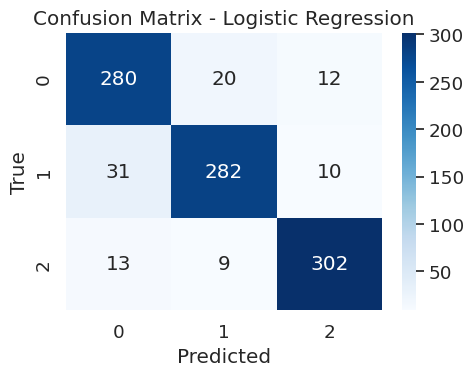

Model: Linear SVM
Accuracy: 0.8916
Macro Precision: 0.8919
Macro Recall: 0.8913
Macro F1-score: 0.8915

Detailed classification report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       312
           1       0.89      0.89      0.89       323
           2       0.94      0.92      0.93       324

    accuracy                           0.89       959
   macro avg       0.89      0.89      0.89       959
weighted avg       0.89      0.89      0.89       959



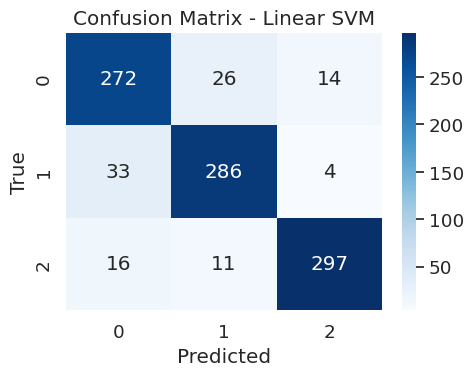

Model: RBF SVM
Accuracy: 0.8989
Macro Precision: 0.8992
Macro Recall: 0.8988
Macro F1-score: 0.8988

Detailed classification report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       312
           1       0.90      0.89      0.90       323
           2       0.94      0.91      0.93       324

    accuracy                           0.90       959
   macro avg       0.90      0.90      0.90       959
weighted avg       0.90      0.90      0.90       959



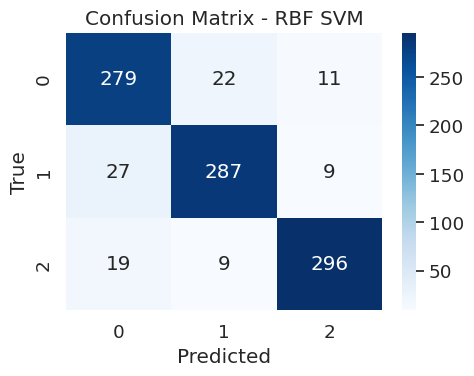

Model: KNN
Accuracy: 0.7508
Macro Precision: 0.7635
Macro Recall: 0.7516
Macro F1-score: 0.7474

Detailed classification report:
              precision    recall  f1-score   support

           0       0.66      0.83      0.73       312
           1       0.83      0.59      0.68       323
           2       0.81      0.84      0.82       324

    accuracy                           0.75       959
   macro avg       0.76      0.75      0.75       959
weighted avg       0.76      0.75      0.75       959



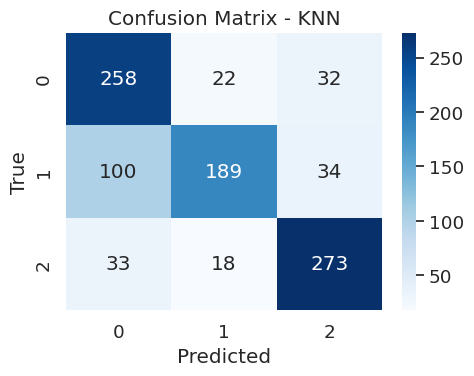

Model: Multinomial NB
Accuracy: 0.8352
Macro Precision: 0.8440
Macro Recall: 0.8333
Macro F1-score: 0.8306

Detailed classification report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       312
           1       0.80      0.87      0.84       323
           2       0.82      0.96      0.88       324

    accuracy                           0.84       959
   macro avg       0.84      0.83      0.83       959
weighted avg       0.84      0.84      0.83       959



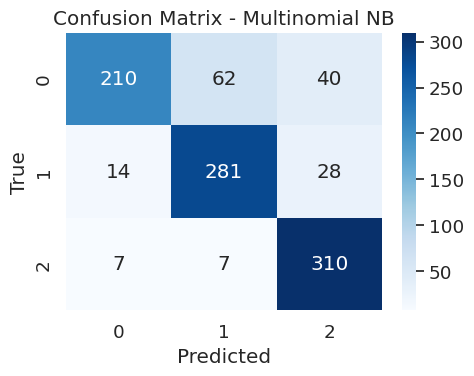

Model: Decision Tree
Accuracy: 0.7372
Macro Precision: 0.7390
Macro Recall: 0.7370
Macro F1-score: 0.7376

Detailed classification report:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       312
           1       0.71      0.70      0.70       323
           2       0.83      0.79      0.81       324

    accuracy                           0.74       959
   macro avg       0.74      0.74      0.74       959
weighted avg       0.74      0.74      0.74       959



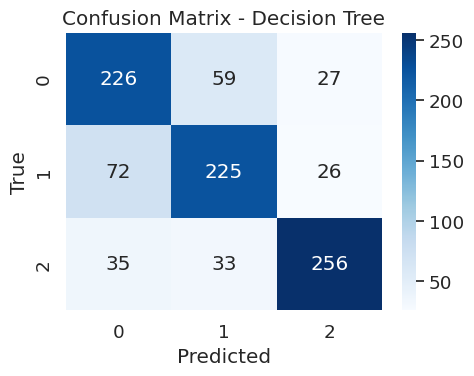

Model: Random Forest
Accuracy: 0.8624
Macro Precision: 0.8649
Macro Recall: 0.8623
Macro F1-score: 0.8624

Detailed classification report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       312
           1       0.91      0.83      0.87       323
           2       0.88      0.90      0.89       324

    accuracy                           0.86       959
   macro avg       0.86      0.86      0.86       959
weighted avg       0.87      0.86      0.86       959



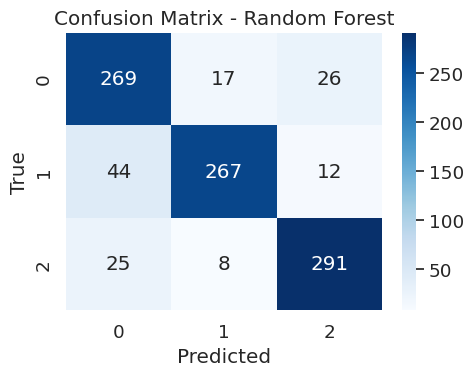

Model: Gradient Boosting
Accuracy: 0.8592
Macro Precision: 0.8634
Macro Recall: 0.8593
Macro F1-score: 0.8597

Detailed classification report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       312
           1       0.90      0.82      0.86       323
           2       0.92      0.89      0.90       324

    accuracy                           0.86       959
   macro avg       0.86      0.86      0.86       959
weighted avg       0.86      0.86      0.86       959



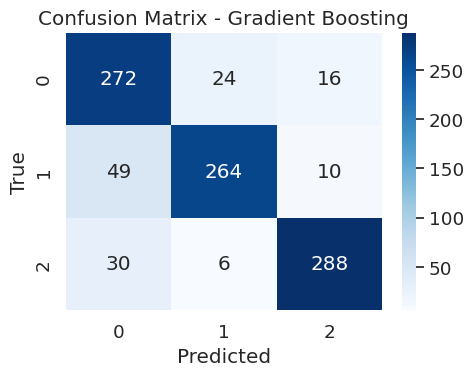

Model: XGBoost
Accuracy: 0.8884
Macro Precision: 0.8891
Macro Recall: 0.8882
Macro F1-score: 0.8884

Detailed classification report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       312
           1       0.88      0.87      0.88       323
           2       0.95      0.92      0.93       324

    accuracy                           0.89       959
   macro avg       0.89      0.89      0.89       959
weighted avg       0.89      0.89      0.89       959



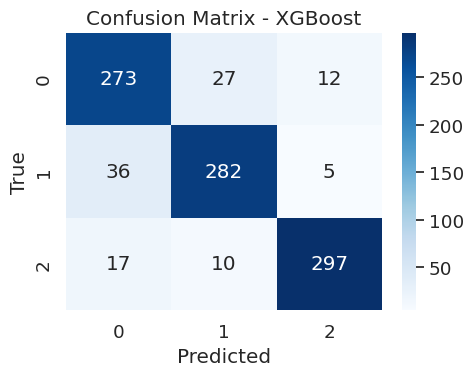

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.608438 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 142990
[LightGBM] [Info] Number of data points in the train set: 3835, number of used features: 5769
[LightGBM] [Info] Start training from score -1.124231
[LightGBM] [Info] Start training from score -1.086431
[LightGBM] [Info] Start training from score -1.085659


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.9020
Macro Precision: 0.9021
Macro Recall: 0.9018
Macro F1-score: 0.9019

Detailed classification report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       312
           1       0.90      0.89      0.89       323
           2       0.95      0.93      0.94       324

    accuracy                           0.90       959
   macro avg       0.90      0.90      0.90       959
weighted avg       0.90      0.90      0.90       959



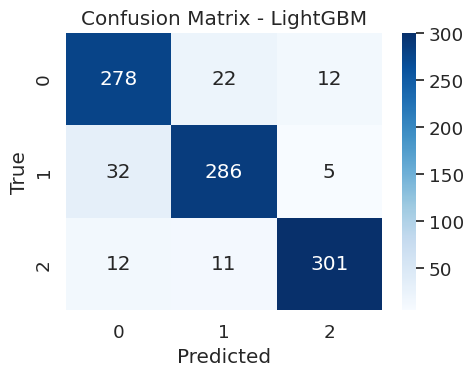

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


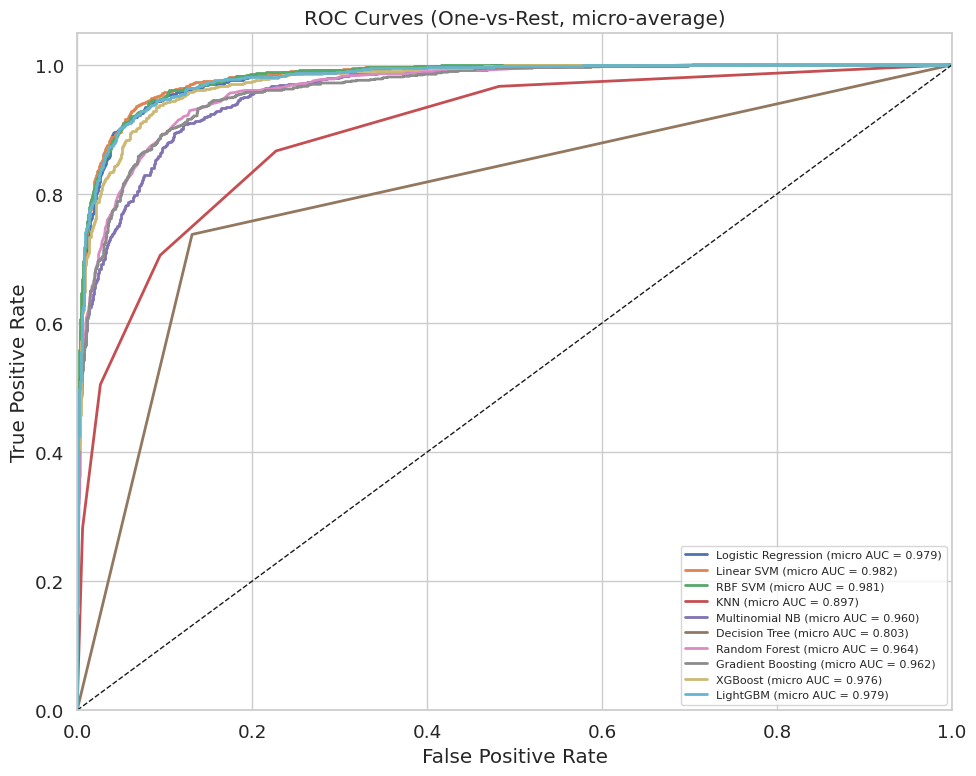


=== Overall Metrics Summary ===
                 Model  Accuracy  Macro Precision  Macro Recall  Macro F1
9             LightGBM  0.901981         0.902149      0.901829  0.901877
0  Logistic Regression  0.900938         0.901016      0.900867  0.900731
2              RBF SVM  0.898853         0.899229      0.898785  0.898819
1           Linear SVM  0.891554         0.891886      0.891303  0.891475
8              XGBoost  0.888425         0.889099      0.888244  0.888446
6        Random Forest  0.862357         0.864913      0.862318  0.862419
7    Gradient Boosting  0.859228         0.863362      0.859340  0.859696
4       Multinomial NB  0.835245         0.844018      0.833279  0.830579
3                  KNN  0.750782         0.763495      0.751552  0.747436
5        Decision Tree  0.737226         0.738979      0.737026  0.737582


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    roc_auc_score
)
from sklearn.preprocessing import label_binarize

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ===========================
# 1. Data split (same as you)
# ===========================
X = shuffled_mr[["Movie Review"]]
y = shuffled_mr["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ==========================================
# 2. Common TF-IDF (word + char) transformer
# ==========================================
tfidf_word = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1, 2),
    min_df=3,
    max_features=20000
)

tfidf_char = TfidfVectorizer(
    analyzer='char',
    ngram_range=(3, 5),
    min_df=3
)

features = ColumnTransformer([
    ('word', tfidf_word, 'Movie Review'),
    ('char', tfidf_char, 'Movie Review'),
])

# ==========================================
# 3. Define all models
# ==========================================
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        C=1.0
    ),
    "Linear SVM": SVC(
        kernel='linear',
        probability=True,
        class_weight='balanced',
        random_state=42
    ),
    "RBF SVM": SVC(
        kernel='rbf',
        probability=True,
        class_weight='balanced',
        random_state=42
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=5
    ),
    "Multinomial NB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced'
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='multi:softprob',
        eval_metric='mlogloss',
        random_state=42,
        n_jobs=-1
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=300,
        learning_rate=0.1,
        objective='multiclass',
        random_state=42,
        n_jobs=-1
    )
}

#==========================================
# 4. Train, evaluate, confusion matrix
#==========================================
results = []

for name, clf in models.items():
    print("="*60)
    print(f"Model: {name}")
    print("="*60)

    # Build pipeline: TF-IDF + model
    pipe = Pipeline([
        ('tfidf', features),
        ('clf', clf)
    ])

    # Train
    pipe.fit(X_train, y_train)

    # Predict
    y_pred = pipe.predict(X_test)

    # Metrics (macro)
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, average='macro', zero_division=0
    )

    print(f"Accuracy: {acc:.4f}")
    print(f"Macro Precision: {precision:.4f}")
    print(f"Macro Recall: {recall:.4f}")
    print(f"Macro F1-score: {f1:.4f}")
    print("\nDetailed classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    labels = sorted(y_test.unique())

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    # Save model + metrics for ROC later
    results.append({
        "name": name,
        "pipeline": pipe,
        "accuracy": acc,
        "precision_macro": precision,
        "recall_macro": recall,
        "f1_macro": f1
    })

# ==========================================
# 5. ROC Curve (One-vs-Rest for all models)
# ==========================================
# If binary, this still works; if multi-class, OvR
classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 8))

for res in results:
    name = res["name"]
    pipe = res["pipeline"]

    # Some models may not have predict_proba, but in this set all do
    y_score = pipe.predict_proba(X_test)

    if n_classes == 1:
        # Edge case: effectively binary with single column after binarize
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score[:, 0])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")
    else:
        # micro-average ROC
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (micro AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (One-vs-Rest, micro-average)")
plt.legend(loc="lower right", fontsize=8)
plt.tight_layout()
plt.show()

# ==========================================
# 6. Optional: summary table of metrics
# ==========================================
summary_df = pd.DataFrame([
    {
        "Model": r["name"],
        "Accuracy": r["accuracy"],
        "Macro Precision": r["precision_macro"],
        "Macro Recall": r["recall_macro"],
        "Macro F1": r["f1_macro"]
    }
    for r in results
])

print("\n=== Overall Metrics Summary ===")
print(summary_df.sort_values(by="Macro F1", ascending=False))



Model: Logistic Regression
Accuracy: 0.8947
Macro Precision: 0.8938
Macro Recall: 0.8940
Macro F1-score: 0.8938

Detailed classification report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       312
           1       0.89      0.89      0.89       323
           2       0.92      0.95      0.94       324

    accuracy                           0.89       959
   macro avg       0.89      0.89      0.89       959
weighted avg       0.89      0.89      0.89       959



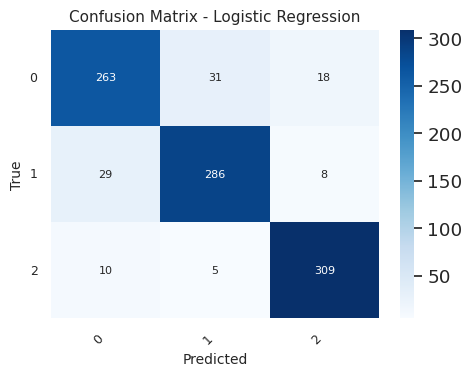

Model: Linear SVM
Accuracy: 0.8936
Macro Precision: 0.8927
Macro Recall: 0.8929
Macro F1-score: 0.8926

Detailed classification report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       312
           1       0.88      0.89      0.89       323
           2       0.93      0.95      0.94       324

    accuracy                           0.89       959
   macro avg       0.89      0.89      0.89       959
weighted avg       0.89      0.89      0.89       959



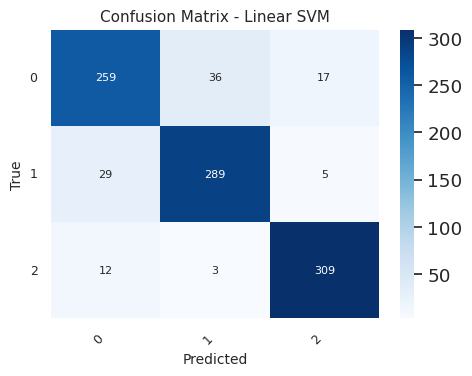

Model: RBF SVM
Accuracy: 0.8884
Macro Precision: 0.8873
Macro Recall: 0.8877
Macro F1-score: 0.8873

Detailed classification report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       312
           1       0.88      0.88      0.88       323
           2       0.92      0.96      0.94       324

    accuracy                           0.89       959
   macro avg       0.89      0.89      0.89       959
weighted avg       0.89      0.89      0.89       959



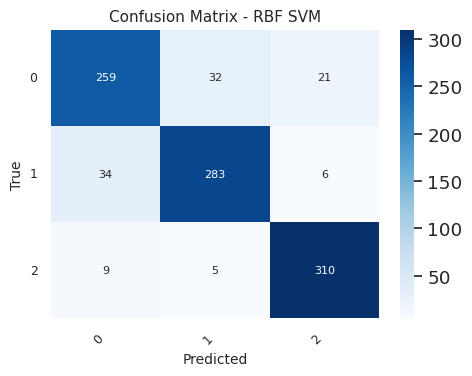

Model: KNN
Accuracy: 0.7341
Macro Precision: 0.7498
Macro Recall: 0.7347
Macro F1-score: 0.7326

Detailed classification report:
              precision    recall  f1-score   support

           0       0.63      0.79      0.70       312
           1       0.83      0.59      0.69       323
           2       0.79      0.81      0.80       324

    accuracy                           0.73       959
   macro avg       0.75      0.73      0.73       959
weighted avg       0.75      0.73      0.73       959



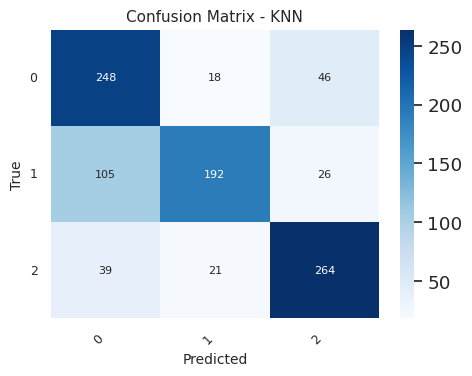

Model: Multinomial NB
Accuracy: 0.8425
Macro Precision: 0.8563
Macro Recall: 0.8401
Macro F1-score: 0.8353

Detailed classification report:
              precision    recall  f1-score   support

           0       0.94      0.63      0.76       312
           1       0.81      0.91      0.86       323
           2       0.82      0.97      0.89       324

    accuracy                           0.84       959
   macro avg       0.86      0.84      0.84       959
weighted avg       0.86      0.84      0.84       959



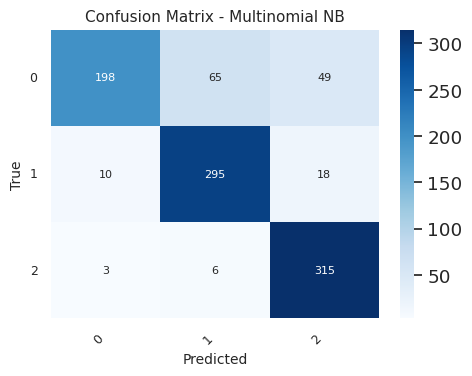

Model: Decision Tree
Accuracy: 0.7205
Macro Precision: 0.7182
Macro Recall: 0.7197
Macro F1-score: 0.7186

Detailed classification report:
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       312
           1       0.71      0.67      0.69       323
           2       0.78      0.83      0.80       324

    accuracy                           0.72       959
   macro avg       0.72      0.72      0.72       959
weighted avg       0.72      0.72      0.72       959



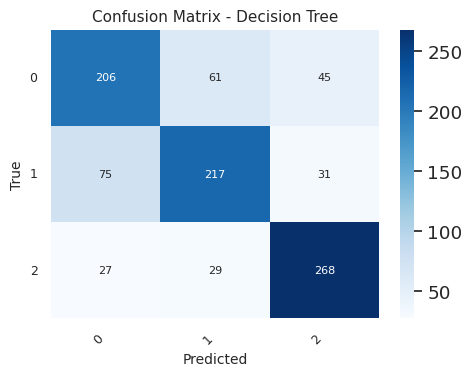

Model: Random Forest
Accuracy: 0.8332
Macro Precision: 0.8334
Macro Recall: 0.8325
Macro F1-score: 0.8311

Detailed classification report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       312
           1       0.87      0.77      0.82       323
           2       0.85      0.94      0.89       324

    accuracy                           0.83       959
   macro avg       0.83      0.83      0.83       959
weighted avg       0.83      0.83      0.83       959



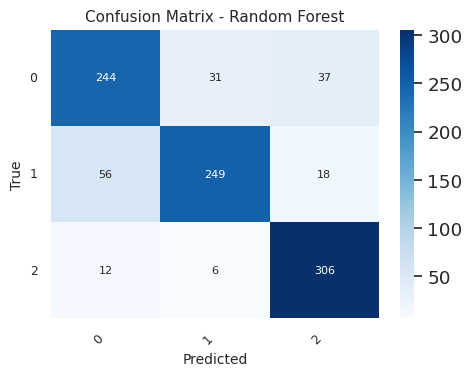

Model: Gradient Boosting
Accuracy: 0.8425
Macro Precision: 0.8473
Macro Recall: 0.8427
Macro F1-score: 0.8425

Detailed classification report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       312
           1       0.89      0.77      0.82       323
           2       0.90      0.90      0.90       324

    accuracy                           0.84       959
   macro avg       0.85      0.84      0.84       959
weighted avg       0.85      0.84      0.84       959



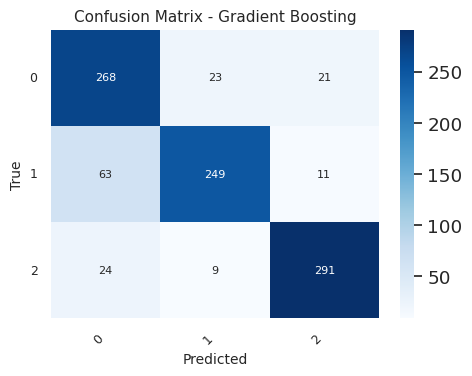

Model: XGBoost
Accuracy: 0.8738
Macro Precision: 0.8735
Macro Recall: 0.8735
Macro F1-score: 0.8732

Detailed classification report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       312
           1       0.87      0.83      0.85       323
           2       0.92      0.94      0.93       324

    accuracy                           0.87       959
   macro avg       0.87      0.87      0.87       959
weighted avg       0.87      0.87      0.87       959



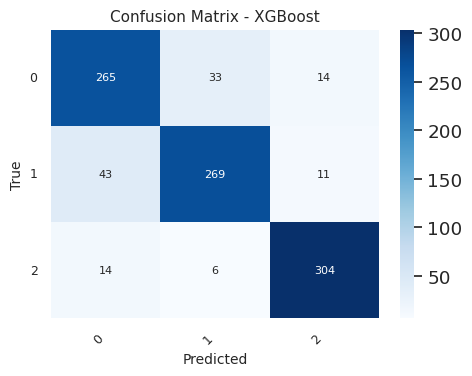

Model: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.389277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142713
[LightGBM] [Info] Number of data points in the train set: 3835, number of used features: 5706
[LightGBM] [Info] Start training from score -1.124231
[LightGBM] [Info] Start training from score -1.086431
[LightGBM] [Info] Start training from score -1.085659


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.8978
Macro Precision: 0.8984
Macro Recall: 0.8977
Macro F1-score: 0.8976

Detailed classification report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       312
           1       0.90      0.85      0.88       323
           2       0.95      0.95      0.95       324

    accuracy                           0.90       959
   macro avg       0.90      0.90      0.90       959
weighted avg       0.90      0.90      0.90       959



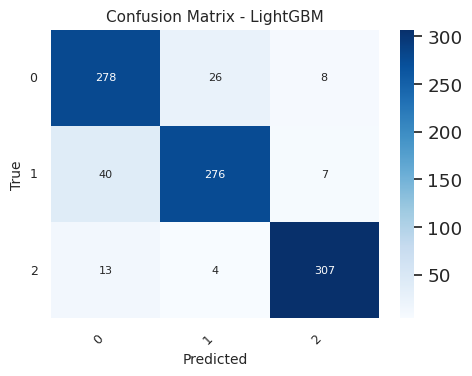

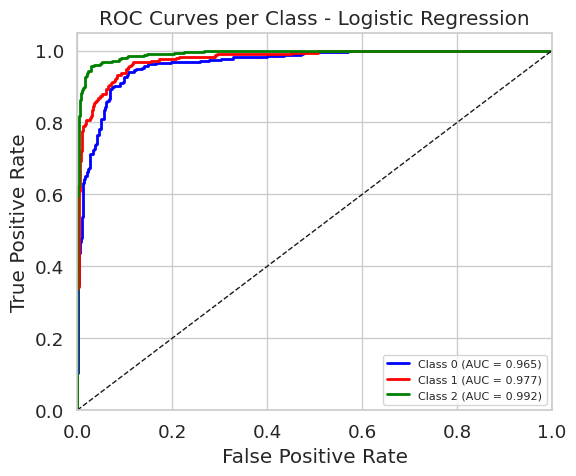

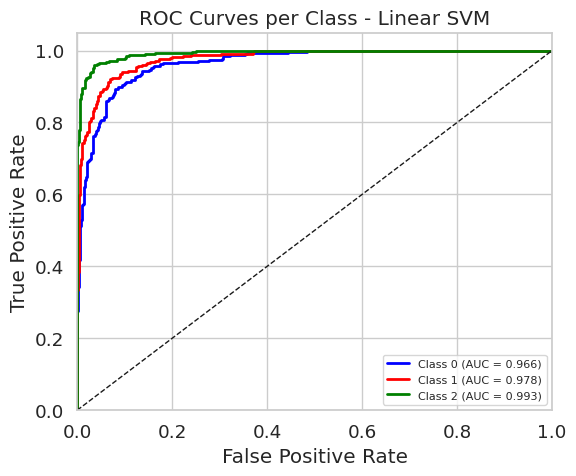

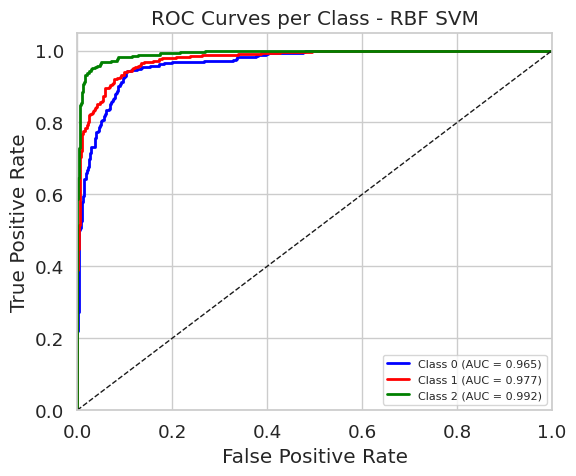

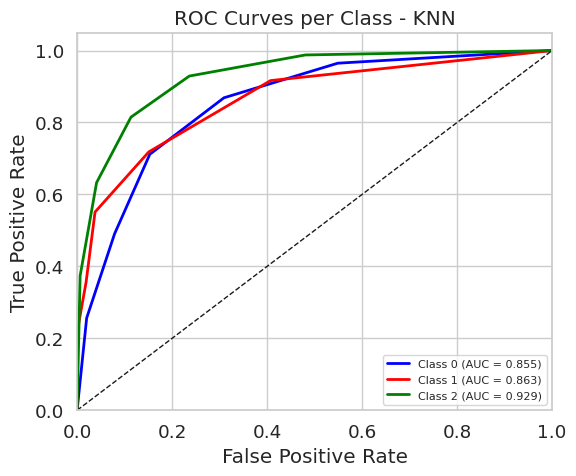

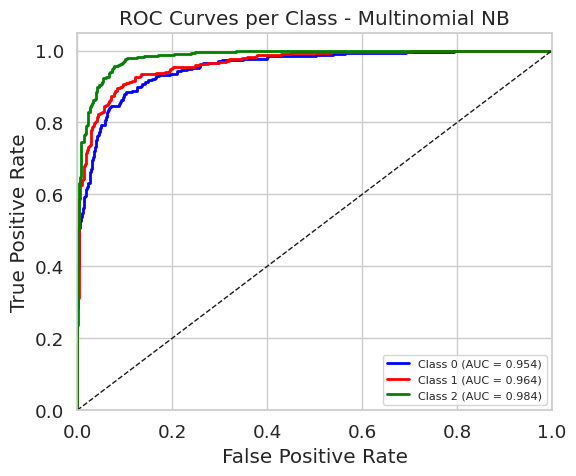

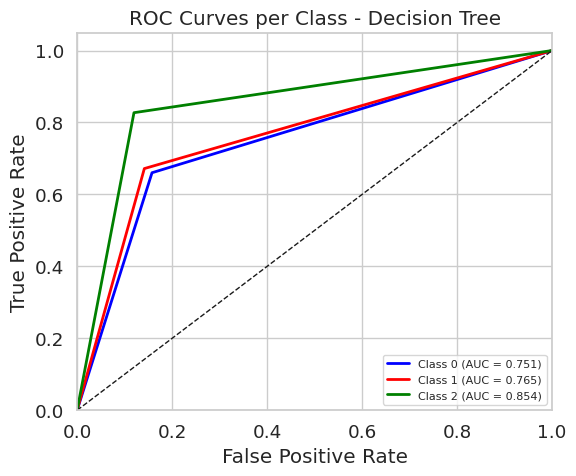

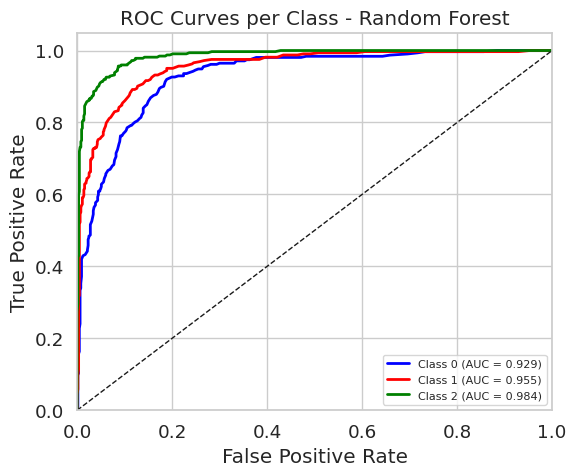

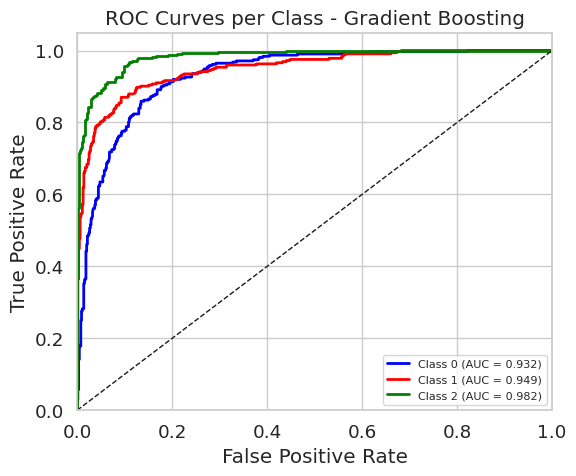

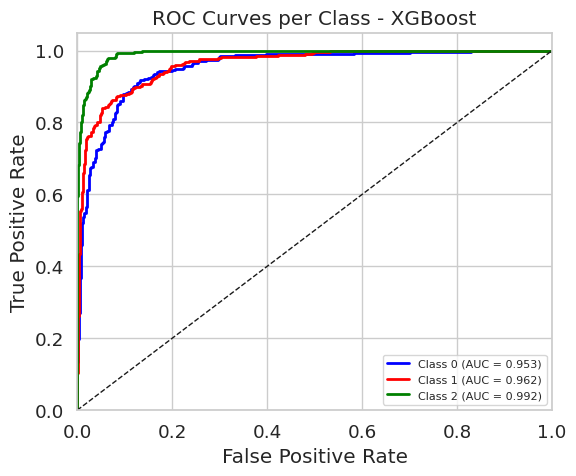

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


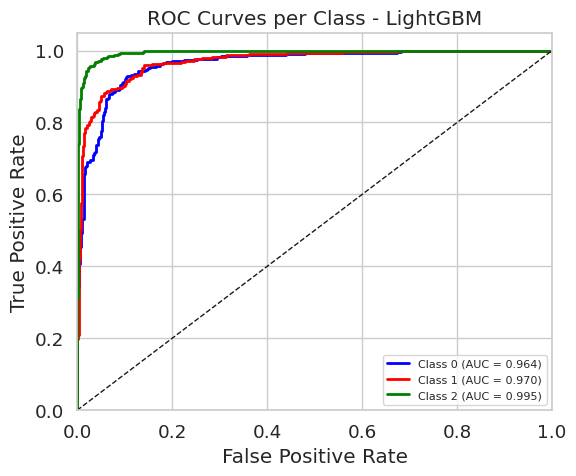


=== Overall Metrics Summary ===
                 Model  Accuracy  Macro Precision  Macro Recall  Macro F1
9             LightGBM  0.897810         0.898419      0.897682  0.897582
0  Logistic Regression  0.894682         0.893816      0.894034  0.893761
1           Linear SVM  0.893639         0.892655      0.892856  0.892594
2              RBF SVM  0.888425         0.887291      0.887693  0.887290
8              XGBoost  0.873827         0.873457      0.873483  0.873221
7    Gradient Boosting  0.842544         0.847326      0.842673  0.842546
4       Multinomial NB  0.842544         0.856336      0.840050  0.835278
6        Random Forest  0.833160         0.833442      0.832465  0.831072
3                  KNN  0.734098         0.749845      0.734705  0.732562
5        Decision Tree  0.720542         0.718247      0.719748  0.718600


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# ===========================
# 1. Data split
# ===========================
X = shuffled_mr[["Movie Review"]]
y = shuffled_mr["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# ==========================================
# 2. Common TF-IDF (word + char) transformer
# ==========================================
tfidf_word = TfidfVectorizer(
    analyzer='word',
    ngram_range=(1, 2),
    min_df=3,
    max_features=20000
)

tfidf_char = TfidfVectorizer(
    analyzer='char',
    ngram_range=(3, 5),
    min_df=3
)

features = ColumnTransformer([
    ('word', tfidf_word, 'Movie Review'),
    ('char', tfidf_char, 'Movie Review'),
])


# ==========================================
# 3. Define all models
# ==========================================
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=2000,
        class_weight='balanced',
        C=1.0
    ),
    "Linear SVM": SVC(
        kernel='linear',
        probability=True,
        class_weight='balanced',
        random_state=42
    ),
    "RBF SVM": SVC(
        kernel='rbf',
        probability=True,
        class_weight='balanced',
        random_state=42
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=5
    ),
    "Multinomial NB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced'
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='multi:softprob',
        eval_metric='mlogloss',
        random_state=42,
        n_jobs=-1
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=300,
        learning_rate=0.1,
        objective='multiclass',
        random_state=42,
        n_jobs=-1
    )
}


# ==========================================
# 4. Train, evaluate, per-model confusion matrix
# ==========================================
results = []


def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=labels,
        yticklabels=labels,
        annot_kws={"size": 8}
    )
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    plt.title(title, fontsize=11)
    plt.xlabel("Predicted", fontsize=10)
    plt.ylabel("True", fontsize=10)
    plt.tight_layout()
    plt.show()


for name, clf in models.items():
    print("="*60)
    print(f"Model: {name}")
    print("="*60)

    # Build pipeline: TF-IDF + model
    pipe = Pipeline([
        ('tfidf', features),
        ('clf', clf)
    ])

    # Train
    pipe.fit(X_train, y_train)

    # Predict
    y_pred = pipe.predict(X_test)

    # Metrics (macro)
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, average='macro', zero_division=0
    )

    print(f"Accuracy: {acc:.4f}")
    print(f"Macro Precision: {precision:.4f}")
    print(f"Macro Recall: {recall:.4f}")
    print(f"Macro F1-score: {f1:.4f}")
    print("\nDetailed classification report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    # Confusion matrix (separate, nice)
    labels = sorted(y_test.unique())
    plot_confusion_matrix(y_test, y_pred, labels, f"Confusion Matrix - {name}")

    # Save model + metrics for ROC later
    results.append({
        "name": name,
        "pipeline": pipe,
        "accuracy": acc,
        "precision_macro": precision,
        "recall_macro": recall,
        "f1_macro": f1
    })


# ==========================================
# 5. ROC Curve: per model, per class (0,1,2)
# ==========================================
classes = sorted(y.unique())          # e.g. [0,1,2] or ['negative','neutral','positive']
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

def plot_roc_per_class(name, pipe, X_test, y_test_bin, classes):
    # probability matrix: shape (n_samples, n_classes)
    y_score = pipe.predict_proba(X_test)

    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(6, 5))

    colors = ['blue', 'red', 'green', 'darkorange', 'purple', 'brown']
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=2,
            label=f"Class {classes[i]} (AUC = {roc_auc[i]:.3f})"
        )

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curves per Class - {name}")
    plt.legend(loc="lower right", fontsize=8)
    plt.tight_layout()
    plt.show()



for res in results:
    plot_roc_per_class(
        name=res["name"],
        pipe=res["pipeline"],
        X_test=X_test,
        y_test_bin=y_test_bin,
        classes=classes
    )


# ==========================================
# 6. Summary table of metrics
# ==========================================
summary_df = pd.DataFrame([
    {
        "Model": r["name"],
        "Accuracy": r["accuracy"],
        "Macro Precision": r["precision_macro"],
        "Macro Recall": r["recall_macro"],
        "Macro F1": r["f1_macro"]
    }
    for r in results
])

print("\n=== Overall Metrics Summary ===")
print(summary_df.sort_values(by="Macro F1", ascending=False))


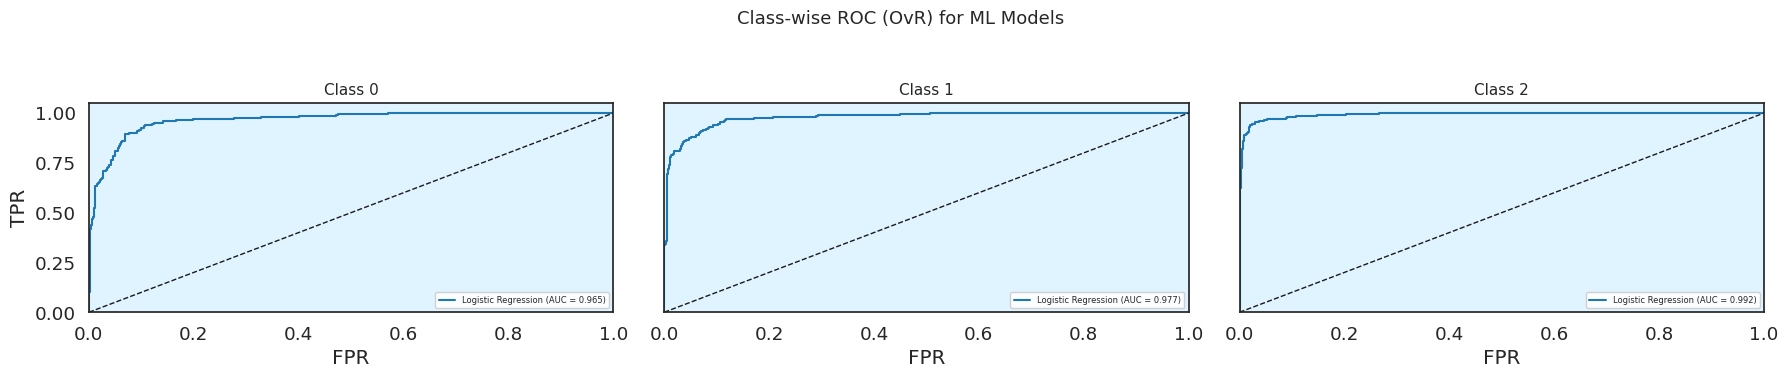

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt



classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]


ml_scores = {}
for res in results:
    name = res["name"]
    pipe = res["pipeline"]
    ml_scores[name] = pipe.predict_proba(X_test)


model_colors = {
    "Logistic Regression": "#1f77b4",
    "Linear SVM":          "#ff7f0e",
    "RBF SVM":             "#2ca02c",
    "KNN":                 "#d62728",
    "Multinomial NB":      "#9467bd",
    "Decision Tree":       "#8c564b",
    "Random Forest":       "#e377c2",
    "Gradient Boosting":   "#7f7f7f",
    "XGBoost":             "#bcbd22",
    "LightGBM":            "#17becf",
}


fig, axes = plt.subplots(1, n_classes, figsize=(18, 4), sharey=True)

for class_idx in range(n_classes):
    ax = axes[class_idx]
    ax.set_facecolor("#e0f4ff")

    for model_name, y_score in ml_scores.items():

        color = model_colors.get(model_name, None)

        # One-vs-Rest for this class
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_idx], y_score[:, class_idx])
        roc_auc = auc(fpr, tpr)

        ax.plot(
            fpr,
            tpr,
            lw=1.5,
            label=f"{model_name} (AUC = {roc_auc:.3f})",
            color=color
        )

    ax.plot([0, 1], [0, 1], 'k--', lw=1)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("FPR")
    if class_idx == 0:
        ax.set_ylabel("TPR")
    ax.set_title(f"Class {classes[class_idx]}", fontsize=11)
    ax.legend(
        loc="lower right",
        fontsize=6,
        frameon=True,
        facecolor="white",
        framealpha=0.9
    )

plt.suptitle("Class-wise ROC (OvR) for ML Models", fontsize=13)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, classification_report



for name, y_pred in [
    ("LSTM", lstm_pred),
    ("BiLSTM", bilstm_pred),
    ("CNN", cnn_pred),
    ("GRU", gru_pred),
]:
    print("="*60)
    print(f"Metrics for {name}")
    print("="*60)


    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, average='macro', zero_division=0
    )

    print(f"Macro Precision: {precision:.4f}")
    print(f"Macro Recall:    {recall:.4f}")
    print(f"Macro F1-score:  {f1:.4f}")


    print("\nDetailed classification report:")
    print(classification_report(
        y_test, y_pred,
        target_names=label_encoder.classes_,
        zero_division=0
    ))


Metrics for LSTM
Macro Precision: 0.1126
Macro Recall:    0.3333
Macro F1-score:  0.1684

Detailed classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.00      0.00      0.00       323
           2       0.34      1.00      0.51       324

    accuracy                           0.34       959
   macro avg       0.11      0.33      0.17       959
weighted avg       0.11      0.34      0.17       959

Metrics for BiLSTM
Macro Precision: 0.8806
Macro Recall:    0.8805
Macro F1-score:  0.8804

Detailed classification report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       312
           1       0.86      0.89      0.88       323
           2       0.92      0.93      0.92       324

    accuracy                           0.88       959
   macro avg       0.88      0.88      0.88       959
weighted avg       0.88      0.88      0.88    

In [ ]:
# ===========================
# 0. Imports
# ===========================
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, GRU, Bidirectional,
    Conv1D, GlobalMaxPooling1D,
    Dense, Dropout
)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)


X = shuffled_mr["Movie Review"].astype(str)
y = shuffled_mr["Sentiment"].astype(str)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

num_classes = len(np.unique(y_train))

max_words = 20000   # vocab size
max_len = 200       # max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(
    X_train_seq, maxlen=max_len, padding="post", truncating="post"
)
X_test_pad = pad_sequences(
    X_test_seq, maxlen=max_len, padding="post", truncating="post"
)


def compile_and_train(model, X_tr, y_tr, X_te, y_te,
                      model_name="Model", epochs=5, batch_size=64):
    """
    Generic train + evaluate function for DL models.
    """
    if num_classes == 2:
        loss_fn = "binary_crossentropy"
        out_activation = "sigmoid"
    else:
        loss_fn = "sparse_categorical_crossentropy"
        out_activation = "softmax"

    # ensure last Dense layer activation
    if isinstance(model.layers[-1], Dense):
        model.layers[-1].activation = tf.keras.activations.get(out_activation)

    model.compile(
        loss=loss_fn,
        optimizer="adam",
        metrics=["accuracy"]
    )

    print("=" * 60)
    print(f"Training: {model_name}")
    print("=" * 60)

    history = model.fit(
        X_tr, y_tr,
        validation_split=0.1,
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    print(f"\nEvaluating: {model_name}")
    y_prob = model.predict(X_te)

    if num_classes == 2:
        y_pred = (y_prob.ravel() > 0.5).astype(int)
    else:
        y_pred = np.argmax(y_prob, axis=1)

    acc = accuracy_score(y_te, y_pred)
    print(f"Test Accuracy ({model_name}): {acc:.4f}\n")

    print("Classification report:")
    print(classification_report(
        y_te, y_pred,
        target_names=label_encoder.classes_
    ))

    print("Confusion matrix:")
    print(confusion_matrix(y_te, y_pred))

    return model, history, y_prob, y_pred, acc


def build_lstm_model():
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
        LSTM(128, return_sequences=False),
        Dropout(0.5),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(num_classes)  # activation set later
    ])
    return model

def build_bilstm_model():
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
        Bidirectional(LSTM(128, return_sequences=False)),
        Dropout(0.5),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(num_classes)
    ])
    return model

def build_cnn_model():
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
        Conv1D(filters=128, kernel_size=5, activation="relu"),
        GlobalMaxPooling1D(),
        Dropout(0.5),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(num_classes)
    ])
    return model

def build_gru_model():
    model = Sequential([
        Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
        GRU(128, return_sequences=False),
        Dropout(0.5),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(num_classes)
    ])
    return model


results_dl = []

# LSTM
lstm_model = build_lstm_model()
lstm_model, lstm_history, lstm_prob, lstm_pred, lstm_acc = compile_and_train(
    lstm_model, X_train_pad, y_train, X_test_pad, y_test,
    model_name="LSTM", epochs=5, batch_size=64
)
results_dl.append({"Model": "LSTM", "Accuracy": lstm_acc})

# BiLSTM
bilstm_model = build_bilstm_model()
bilstm_model, bilstm_history, bilstm_prob, bilstm_pred, bilstm_acc = compile_and_train(
    bilstm_model, X_train_pad, y_train, X_test_pad, y_test,
    model_name="BiLSTM", epochs=5, batch_size=64
)
results_dl.append({"Model": "BiLSTM", "Accuracy": bilstm_acc})

# CNN
cnn_model = build_cnn_model()
cnn_model, cnn_history, cnn_prob, cnn_pred, cnn_acc = compile_and_train(
    cnn_model, X_train_pad, y_train, X_test_pad, y_test,
    model_name="CNN", epochs=5, batch_size=64
)
results_dl.append({"Model": "CNN", "Accuracy": cnn_acc})

# GRU
gru_model = build_gru_model()
gru_model, gru_history, gru_prob, gru_pred, gru_acc = compile_and_train(
    gru_model, X_train_pad, y_train, X_test_pad, y_test,
    model_name="GRU", epochs=5, batch_size=64
)
results_dl.append({"Model": "GRU", "Accuracy": gru_acc})

dl_summary_df = pd.DataFrame(results_dl)
print("\n=== Deep Learning Models Summary ===")
print(dl_summary_df.sort_values(by="Accuracy", ascending=False))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Training: LSTM
Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 518ms/step - accuracy: 0.3246 - loss: 1.1006 - val_accuracy: 0.3542 - val_loss: 1.0963
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 512ms/step - accuracy: 0.3286 - loss: 1.1043 - val_accuracy: 0.3438 - val_loss: 1.0975
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 510ms/step - accuracy: 0.3481 - loss: 1.0983 - val_accuracy: 0.3021 - val_loss: 1.1017
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 509ms/step - accuracy: 0.3411 - loss: 1.0997 - val_accuracy: 0.3438 - val_loss: 1.0997
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 511ms/step - accuracy: 0.3474 - loss: 1.0992 - val_accuracy: 0.3542 - val_loss: 1.0969

Evaluating: LSTM
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step
Test Accuracy (LSTM): 0.3379

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.00      0.00      0.00       323
           2       0.34      1.00      0.51       324

    accuracy   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/keras/src

54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 998ms/step - accuracy: 0.4103 - loss: 1.0743 - val_accuracy: 0.7500 - val_loss: 0.6172
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 981ms/step - accuracy: 0.7934 - loss: 0.5036 - val_accuracy: 0.8385 - val_loss: 0.4345
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 982ms/step - accuracy: 0.9557 - loss: 0.1491 - val_accuracy: 0.8385 - val_loss: 0.4828
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 80s 953ms/step - accuracy: 0.9809 - loss: 0.0807 - val_accuracy: 0.8594 - val_loss: 0.4736
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 51s 946ms/step - accuracy: 0.9858 - loss: 0.0658 - val_accuracy: 0.8516 - val_loss: 0.5917

Evaluating: BiLSTM
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step
Test Accuracy (BiLSTM): 0.8811

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       312
           1       0.86      0.89      0.88       323
           2       0.92      0.93      0.92       324

    accuracy                        

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - accuracy: 0.3920 - loss: 1.0876 - val_accuracy: 0.6771 - val_loss: 0.9285
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.6752 - loss: 0.8150 - val_accuracy: 0.8333 - val_loss: 0.4539
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.8843 - loss: 0.3505 - val_accuracy: 0.8646 - val_loss: 0.3630
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9734 - loss: 0.1056 - val_accuracy: 0.8568 - val_loss: 0.4086
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.9909 - loss: 0.0502 - val_accuracy: 0.8698 - val_loss: 0.4307

Evaluating: CNN
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Test Accuracy (CNN): 0.8843

Classification report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       312
           1       0.89      0.87      0.88       323
           2       0.90      0.94      0.92       324

    accuracy                           0.88

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 533ms/step - accuracy: 0.3321 - loss: 1.1007 - val_accuracy: 0.3021 - val_loss: 1.1022
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 504ms/step - accuracy: 0.3374 - loss: 1.1016 - val_accuracy: 0.3542 - val_loss: 1.0979
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 512ms/step - accuracy: 0.3435 - loss: 1.0989 - val_accuracy: 0.3021 - val_loss: 1.1004
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 514ms/step - accuracy: 0.3281 - loss: 1.1006 - val_accuracy: 0.3021 - val_loss: 1.0991
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 500ms/step - accuracy: 0.3293 - loss: 1.0994 - val_accuracy: 0.3542 - val_loss: 1.0971

Evaluating: GRU
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step
Test Accuracy (GRU): 0.3379

Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       312
           1       0.00      0.00      0.00       323
           2       0.34      1.00      0.51       324

    accuracy                           0.34

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


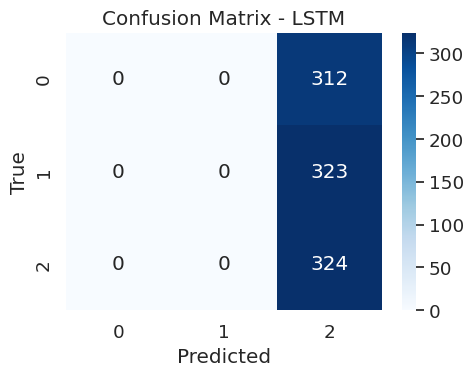

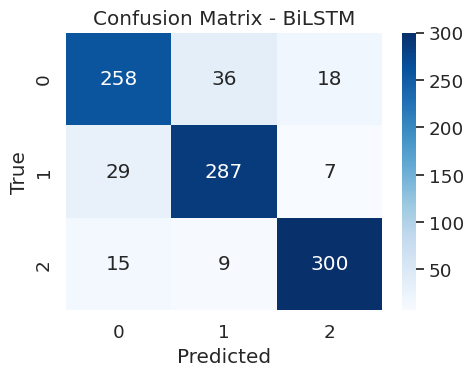

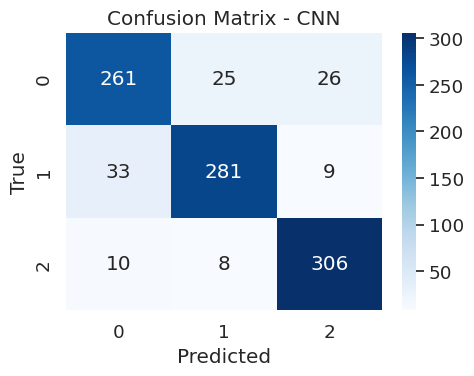

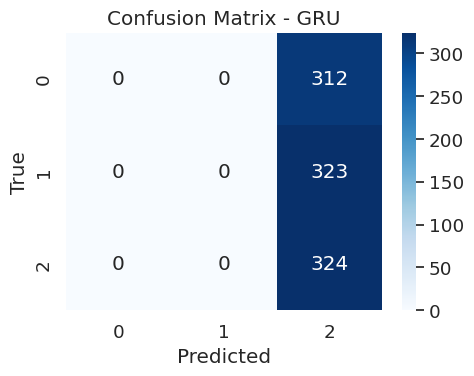

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

classes = label_encoder.classes_

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

# DL models
plot_confusion_matrix(y_test, lstm_pred,   "LSTM")
plot_confusion_matrix(y_test, bilstm_pred, "BiLSTM")
plot_confusion_matrix(y_test, cnn_pred,    "CNN")
plot_confusion_matrix(y_test, gru_pred,    "GRU")


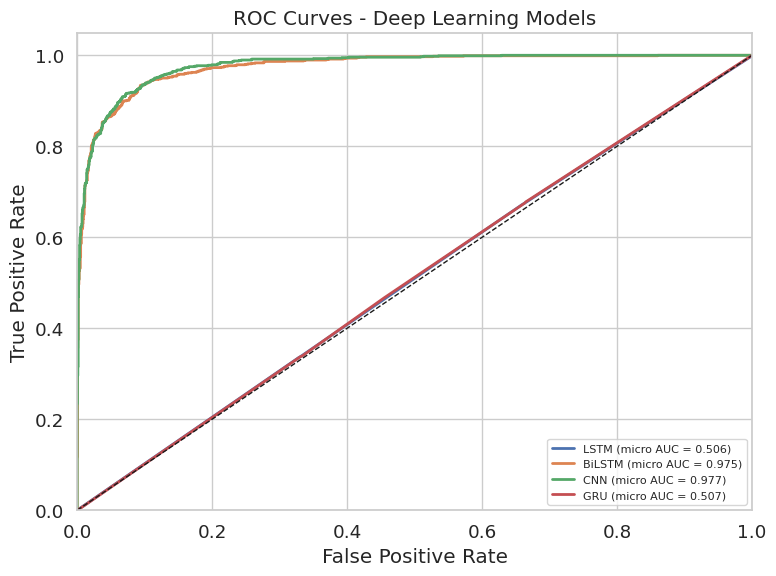

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np

# classes & binarize
classes = np.arange(num_classes)      # 0,1,2,...
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))

def plot_roc_for_model(name, y_score):
    # y_score = probability matrix (n_samples, n_classes)
    if n_classes == 2:
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")
    else:
        # micro-average ROC
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f"{name} (micro AUC = {roc_auc:.3f})")

# DL models: use *_prob from compile_and_train
plot_roc_for_model("LSTM",   lstm_prob)
plot_roc_for_model("BiLSTM", bilstm_prob)
plot_roc_for_model("CNN",    cnn_prob)
plot_roc_for_model("GRU",    gru_prob)

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Deep Learning Models")
plt.legend(loc="lower right", fontsize=8)
plt.tight_layout()
plt.show()


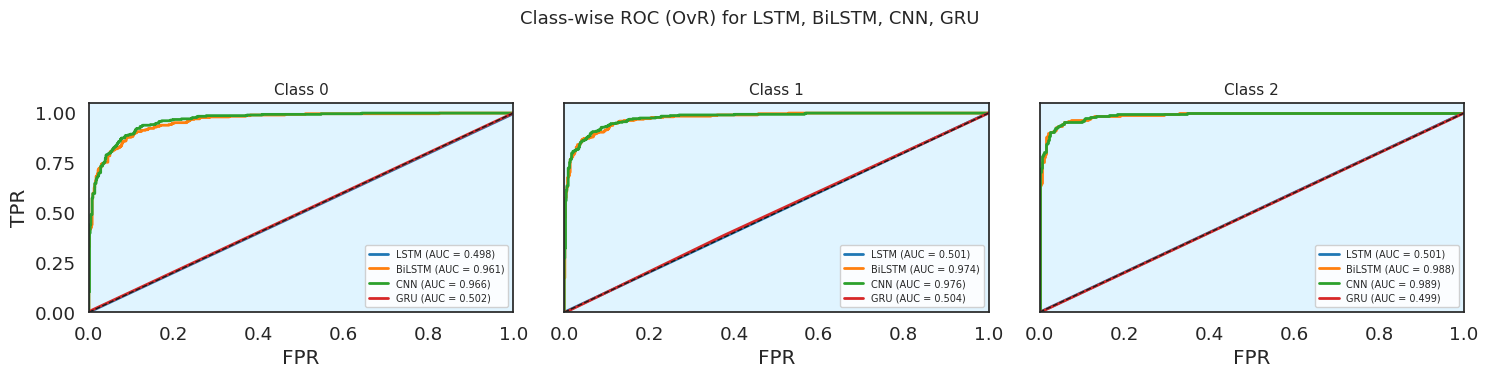

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# classes & binarize
classes = np.arange(num_classes)      # 0,1,2,...
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# DL model probabilities: lstm_prob, bilstm_prob, cnn_prob, gru_prob
model_scores = {
    "LSTM":   lstm_prob,
    "BiLSTM": bilstm_prob,
    "CNN":    cnn_prob,
    "GRU":    gru_prob
}

model_colors = {
    "LSTM":   "#1f77b4",  # blue
    "BiLSTM": "#ff7f0e",  # orange
    "CNN":    "#2ca02c",  # green
    "GRU":    "#d62728"   # red
}

fig, axes = plt.subplots(1, n_classes, figsize=(15, 4), sharey=True)

for class_idx in range(n_classes):
    ax = axes[class_idx]
    ax.set_facecolor("#e0f4ff")  # light sky background

    for model_name, y_score in model_scores.items():
        # One-vs-Rest for this class
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_idx], y_score[:, class_idx])
        roc_auc = auc(fpr, tpr)

        ax.plot(
            fpr,
            tpr,
            lw=2,
            color=model_colors[model_name],
            label=f"{model_name} (AUC = {roc_auc:.3f})"
        )

    ax.plot([0, 1], [0, 1], 'k--', lw=1)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("FPR")
    if class_idx == 0:
        ax.set_ylabel("TPR")
    ax.set_title(f"Class {classes[class_idx]}", fontsize=11)
    ax.legend(loc="lower right", fontsize=7, frameon=True, facecolor="white", framealpha=0.9)

plt.suptitle("Class-wise ROC (OvR) for LSTM, BiLSTM, CNN, GRU", fontsize=13)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


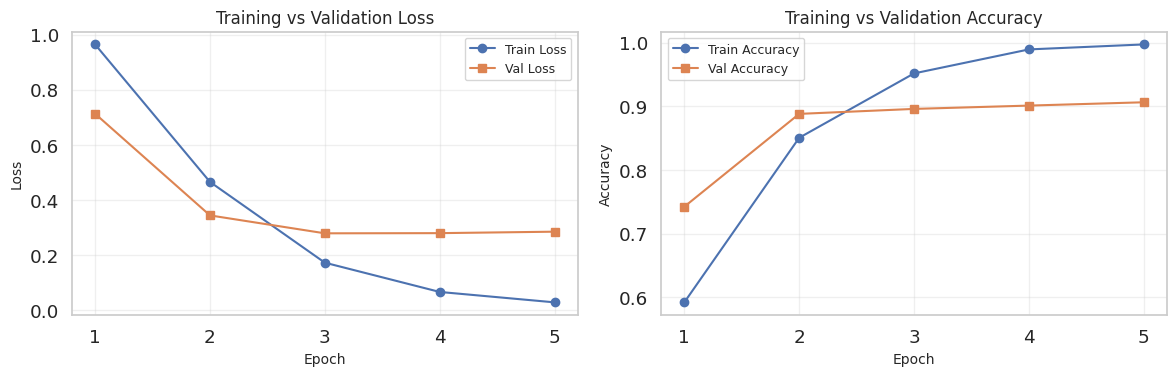

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

print(history.history.keys())

epochs = range(1, len(history.history["loss"]) + 1)

plt.figure(figsize=(12, 4))

# --------- Loss curve ---------
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history["loss"], marker="o", label="Train Loss")
plt.plot(epochs, history.history["val_loss"], marker="s", label="Val Loss")
plt.title("Training vs Validation Loss", fontsize=12)
plt.xlabel("Epoch", fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.xticks(epochs)
plt.legend(fontsize=9)
plt.grid(alpha=0.3)

# --------- Accuracy curve ---------
acc_key = "accuracy"
val_acc_key = "val_accuracy"

plt.subplot(1, 2, 2)
plt.plot(epochs, history.history[acc_key], marker="o", label="Train Accuracy")
plt.plot(epochs, history.history[val_acc_key], marker="s", label="Val Accuracy")
plt.title("Training vs Validation Accuracy", fontsize=12)
plt.xlabel("Epoch", fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.xticks(epochs)
plt.legend(fontsize=9)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


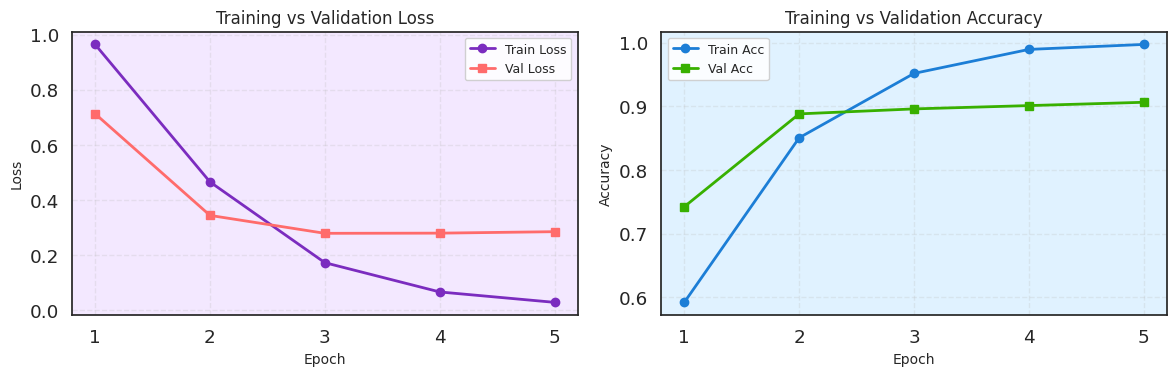

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("white")  # clean style

epochs = range(1, len(history.history["loss"]) + 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# pastel background colors
axes[0].set_facecolor("#f3e8ff")  # light pastel purple
axes[1].set_facecolor("#e0f2ff")  # light sky blue

# --------- Loss curve (left) ---------
axes[0].plot(
    epochs,
    history.history["loss"],
    marker="o",
    color="#7b2cbf",          # deep purple
    linewidth=2,
    label="Train Loss"
)
axes[0].plot(
    epochs,
    history.history["val_loss"],
    marker="s",
    color="#ff6b6b",          # coral red
    linewidth=2,
    label="Val Loss"
)
axes[0].set_title("Training vs Validation Loss", fontsize=12)
axes[0].set_xlabel("Epoch", fontsize=10)
axes[0].set_ylabel("Loss", fontsize=10)
axes[0].set_xticks(epochs)
axes[0].legend(fontsize=9, frameon=True, facecolor="white", framealpha=0.9)
axes[0].grid(alpha=0.25, color="#bbbbbb", linestyle="--")

# --------- Accuracy curve (right) ---------
acc_key = "accuracy"
val_acc_key = "val_accuracy"

axes[1].plot(
    epochs,
    history.history[acc_key],
    marker="o",
    color="#1c7ed6",          # blue
    linewidth=2,
    label="Train Acc"
)
axes[1].plot(
    epochs,
    history.history[val_acc_key],
    marker="s",
    color="#38b000",          # green
    linewidth=2,
    label="Val Acc"
)
axes[1].set_title("Training vs Validation Accuracy", fontsize=12)
axes[1].set_xlabel("Epoch", fontsize=10)
axes[1].set_ylabel("Accuracy", fontsize=10)
axes[1].set_xticks(epochs)
axes[1].legend(fontsize=9, frameon=True, facecolor="white", framealpha=0.9)
axes[1].grid(alpha=0.25, color="#bbbbbb", linestyle="--")

plt.tight_layout()
plt.show()


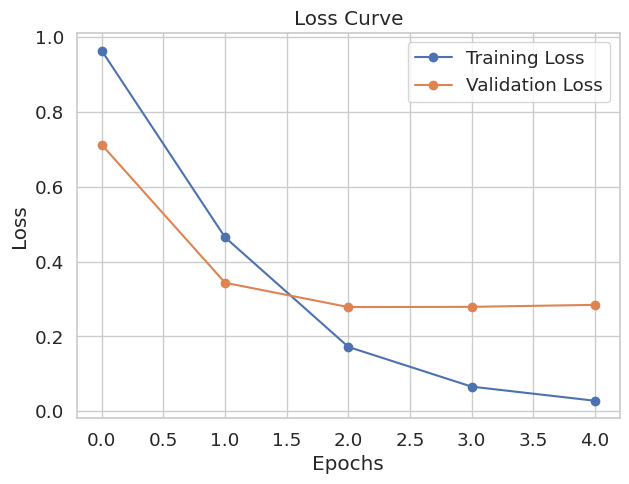

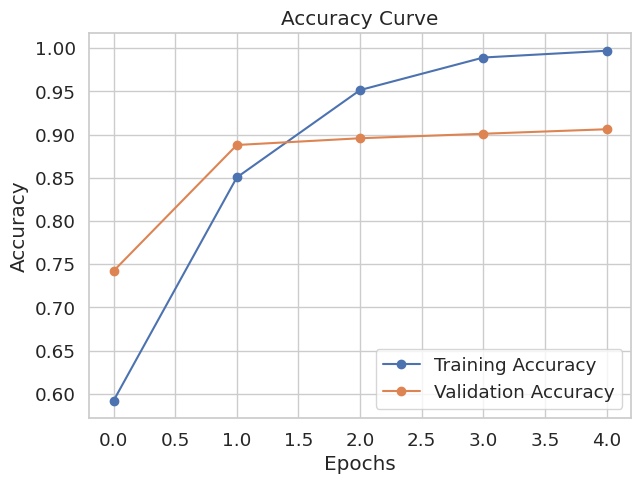

In [ ]:
import matplotlib.pyplot as plt

# ========================
# 1️⃣ Loss Curve
# ========================
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# ========================
# 2️⃣ Accuracy Curve
# ========================
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()


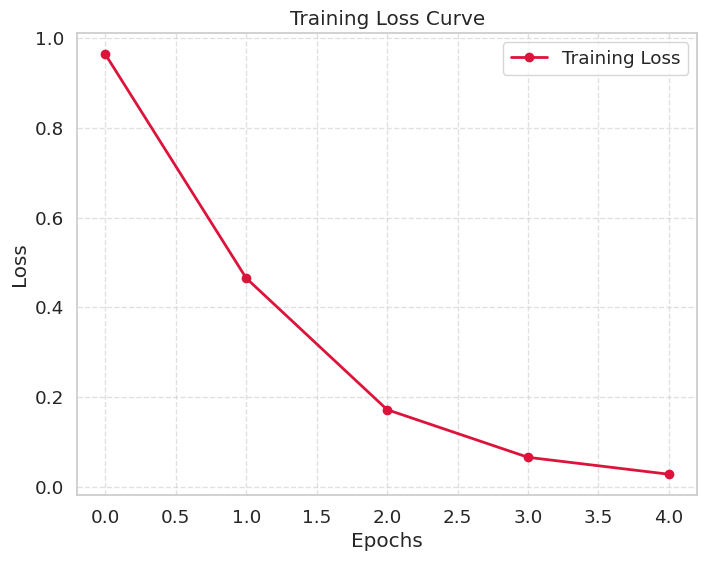

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.2)

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'],
         label='Training Loss',
         color='crimson',
         marker='o',
         linewidth=2,
         markersize=6)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


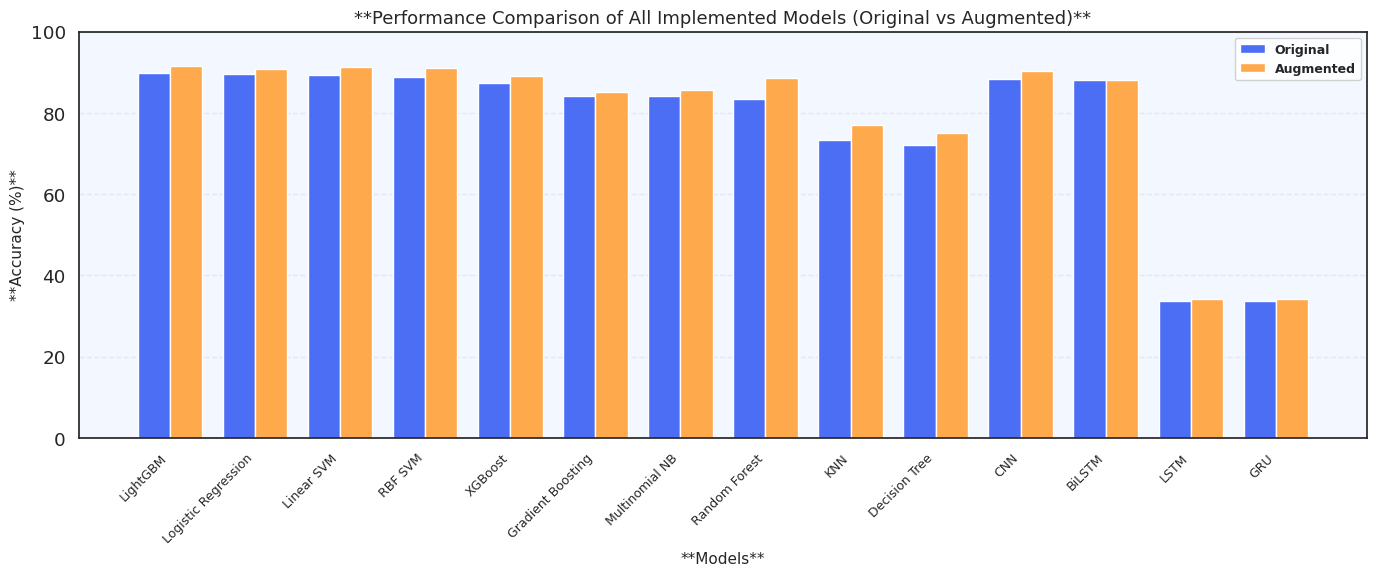

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# 1. Data: original vs augmented
# ==========================
models = [
    "LightGBM", "Logistic Regression", "Linear SVM", "RBF SVM",
    "XGBoost", "Gradient Boosting", "Multinomial NB", "Random Forest",
    "KNN", "Decision Tree",
    "CNN", "BiLSTM", "LSTM", "GRU"
]

original_acc = [
    0.897810, 0.894682, 0.893639, 0.888425,
    0.873827, 0.842544, 0.842544, 0.833160,
    0.734098, 0.720542,
    0.884254, 0.881126, 0.337852, 0.337852
]

augmented_acc = [
    0.916115, 0.908756, 0.912436, 0.910964,
    0.889625, 0.852097, 0.855040, 0.885210,
    0.768948, 0.749816,
    0.902369, 0.880833, 0.342426, 0.342426
]

# convert to percentage (0–100)
original_acc_pct = [a * 100 for a in original_acc]
augmented_acc_pct = [a * 100 for a in augmented_acc]

# ==========================
# 2. Plot settings
# ==========================
x = np.arange(len(models))
width = 0.38

plt.figure(figsize=(14, 6))
ax = plt.gca()
ax.set_facecolor("#f3f7ff")  # halka light blue/purple background

# bars
orig_bars = plt.bar(
    x - width/2, original_acc_pct, width,
    label="Original", color="#4c6ef5"
)
aug_bars = plt.bar(
    x + width/2, augmented_acc_pct, width,
    label="Augmented", color="#ffa94d"
)

# ==========================
# 3. Labels, title, styling
# ==========================
plt.xticks(x, models, rotation=45, ha="right", fontsize=9)

plt.ylabel("**Accuracy (%)**", fontsize=11)
plt.xlabel("**Models**", fontsize=11)
plt.title("**Performance Comparison of All Implemented Models (Original vs Augmented)**",
          fontsize=13)

plt.ylim(0, 100)  # 0–100 range

plt.grid(axis="y", alpha=0.25, linestyle="--", color="#bbbbbb")
legend = plt.legend(frameon=True, facecolor="white", framealpha=0.9, fontsize=9)
for text in legend.get_texts():
    text.set_fontweight("bold")

plt.tight_layout()
plt.show()


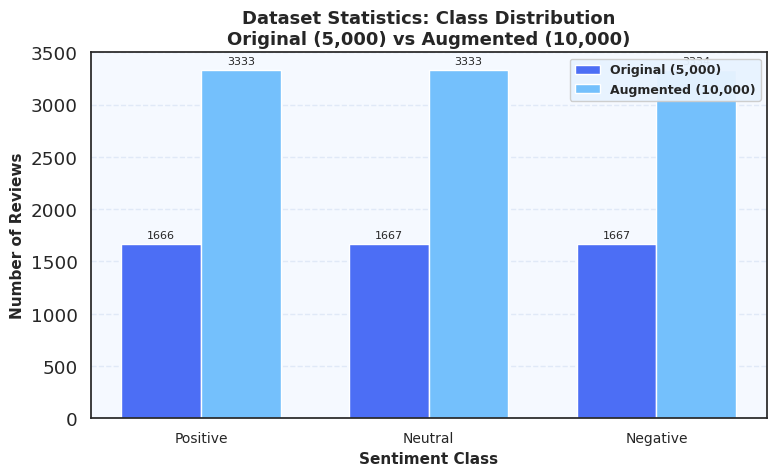

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# 1. Class counts (example: equal split)
# ==========================
classes = ["Positive", "Neutral", "Negative"]

original_counts = [1666, 1667, 1667]  # sum ≈ 5000
augmented_counts = [3333, 3333, 3334] # sum ≈ 10000

x = np.arange(len(classes))
width = 0.35

plt.figure(figsize=(8, 5))
ax = plt.gca()
ax.set_facecolor("#f5f9ff")
# ==========================
# 2. Bars
# ==========================
orig_bars = plt.bar(
    x - width/2, original_counts, width,
    label="Original (5,000)",
    color="#4c6ef5"    # blue
)
aug_bars = plt.bar(
    x + width/2, augmented_counts, width,
    label="Augmented (10,000)",
    color="#74c0fc"    # sky blue
)

# ==========================
# 3. Labels & title
# ==========================
plt.xticks(x, classes, fontsize=10)
plt.ylabel("Number of Reviews", fontsize=11, fontweight="bold")
plt.xlabel("Sentiment Class", fontsize=11, fontweight="bold")
plt.title(
    "Dataset Statistics: Class Distribution\nOriginal (5,000) vs Augmented (10,000)",
    fontsize=13, fontweight="bold"
)

plt.grid(axis="y", alpha=0.3, linestyle="--", color="#b0c4e6")

# Legend box
legend = plt.legend(
    frameon=True,
    facecolor="#e8f3ff",
    framealpha=0.95,
    fontsize=9
)
for text in legend.get_texts():
    text.set_fontweight("bold")

# Optional: bar value labels
for bars in [orig_bars, aug_bars]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + max(original_counts + augmented_counts)*0.01,
            f"{int(height)}",
            ha="center", va="bottom", fontsize=8
        )

plt.tight_layout()
plt.show()


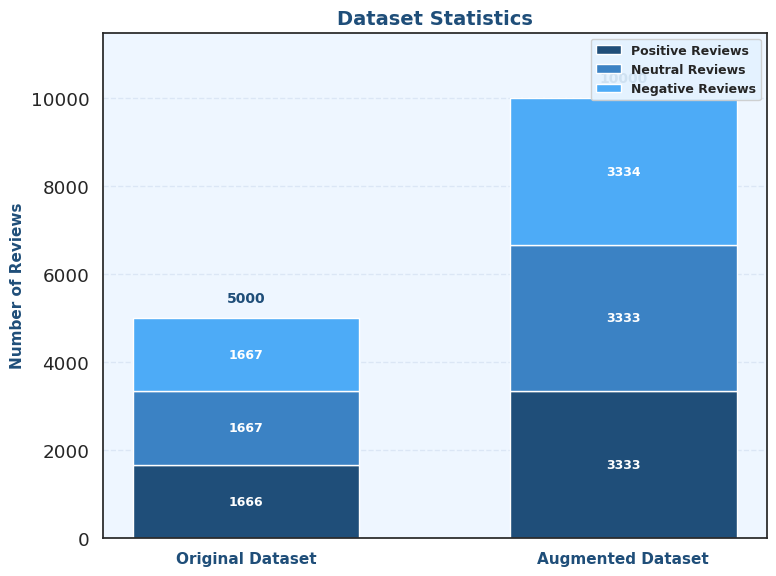

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ==========================
# 1. Counts (example: equal split)
# ==========================
# Original dataset: 5000
orig_pos = 1666
orig_neu = 1667
orig_neg = 1667
orig_total = orig_pos + orig_neu + orig_neg

# Augmented dataset: 10000
aug_pos = 3333
aug_neu = 3333
aug_neg = 3334
aug_total = aug_pos + aug_neu + aug_neg

# ==========================
# 2. Bar positions
# ==========================
labels = ["Original Dataset", "Augmented Dataset"]
x = np.arange(len(labels))
bar_width = 0.6

# colors (dark blue + sky blue tones)
dark_blue = "#1f4e79"   # deep blue
sky_blue  = "#4dabf7"   # sky blue
mid_blue  = "#3b82c4"   # medium blue (for neutral)

plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_facecolor("#eef6ff")  # very light blue background

# ==========================
# 3. Stacked bars
# ==========================

# Original
orig_pos_bar = ax.bar(x[0], orig_pos, bar_width, color=dark_blue, label="Positive Reviews")
orig_neu_bar = ax.bar(x[0], orig_neu, bar_width, bottom=orig_pos, color=mid_blue, label="Neutral Reviews")
orig_neg_bar = ax.bar(x[0], orig_neg, bar_width, bottom=orig_pos + orig_neu, color=sky_blue, label="Negative Reviews")

# Augmented
aug_pos_bar = ax.bar(x[1], aug_pos, bar_width, color=dark_blue)
aug_neu_bar = ax.bar(x[1], aug_neu, bar_width, bottom=aug_pos, color=mid_blue)
aug_neg_bar = ax.bar(x[1], aug_neg, bar_width, bottom=aug_pos + aug_neu, color=sky_blue)

# ==========================
# 4. Axis labels, title, ticks
# ==========================
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11, fontweight="bold", color=dark_blue)
ax.set_ylabel("Number of Reviews", fontsize=11, fontweight="bold", color=dark_blue)
ax.set_title("Dataset Statistics", fontsize=14, fontweight="bold", color=dark_blue)

ax.set_ylim(0, max(orig_total, aug_total) * 1.15)
ax.grid(axis="y", linestyle="--", alpha=0.3, color="#b0c4de")

# ==========================
# 5. Number labels inside bars
# ==========================

def add_center_label(bottom, height, x_pos, text, color="white"):
    ax.text(
        x_pos,
        bottom + height / 2,
        str(text),
        ha="center",
        va="center",
        fontsize=9,
        color=color,
        fontweight="bold"
    )

# Original segments
add_center_label(0,                orig_pos, x[0], orig_pos)
add_center_label(orig_pos,         orig_neu, x[0], orig_neu)
add_center_label(orig_pos+orig_neu, orig_neg, x[0], orig_neg)

# Augmented segments
add_center_label(0,                aug_pos, x[1], aug_pos)
add_center_label(aug_pos,          aug_neu, x[1], aug_neu)
add_center_label(aug_pos+aug_neu,  aug_neg, x[1], aug_neg)

# Total labels on top
ax.text(x[0], orig_total + max(orig_total, aug_total)*0.03,
        str(orig_total), ha="center", va="bottom",
        fontsize=10, color=dark_blue, fontweight="bold")
ax.text(x[1], aug_total + max(orig_total, aug_total)*0.03,
        str(aug_total), ha="center", va="bottom",
        fontsize=10, color=dark_blue, fontweight="bold")

# ==========================
# 6. Legend
# ==========================
legend = ax.legend(
    loc="upper right",
    frameon=True,
    facecolor="#e3f2ff",
    framealpha=0.9,
    fontsize=9
)
for t in legend.get_texts():
    t.set_fontweight("bold")

plt.tight_layout()
plt.show()




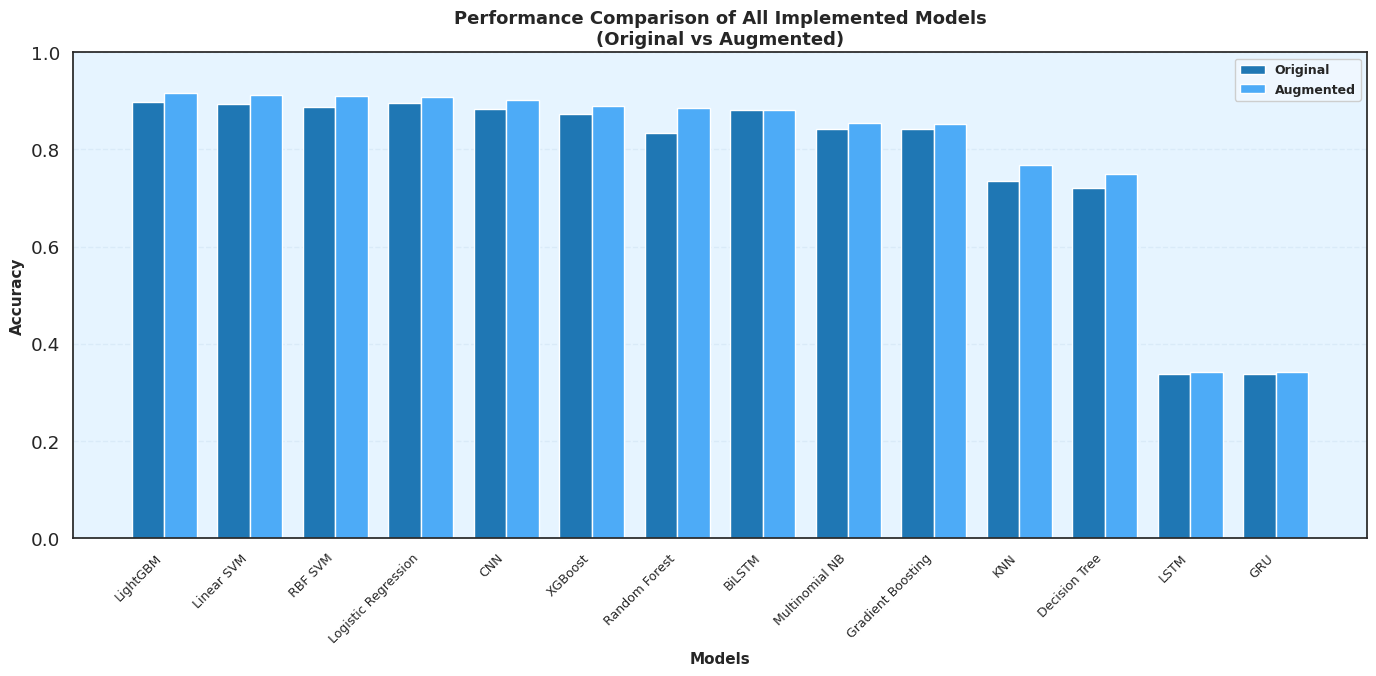

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================
# 1. Raw accuracy data
# ==========================
models = [
    "LightGBM", "Logistic Regression", "Linear SVM", "RBF SVM",
    "XGBoost", "Gradient Boosting", "Multinomial NB", "Random Forest",
    "KNN", "Decision Tree",
    "CNN", "BiLSTM", "LSTM", "GRU"
]

original_acc = [
    0.897810, 0.894682, 0.893639, 0.888425,
    0.873827, 0.842544, 0.842544, 0.833160,
    0.734098, 0.720542,
    0.884254, 0.881126, 0.337852, 0.337852
]

augmented_acc = [
    0.916115, 0.908756, 0.912436, 0.910964,
    0.889625, 0.852097, 0.855040, 0.885210,
    0.768948, 0.749816,
    0.902369, 0.880833, 0.342426, 0.342426
]

# ==========================
# 2. Sort by augmented (boro theke chhoto)
# ==========================
data = list(zip(models, original_acc, augmented_acc))
data_sorted = sorted(data, key=lambda x: x[2], reverse=True)

models_sorted, original_sorted, augmented_sorted = zip(*data_sorted)

x = np.arange(len(models_sorted))
width = 0.38

plt.figure(figsize=(14, 7))
ax = plt.gca()
ax.set_facecolor("#e6f4ff")  # halka sky background

# ==========================
# 3. Bars (blue + sky blue)
# ==========================
orig_bars = plt.bar(
    x - width/2, original_sorted, width,
    label="Original",
    color="#1f77b4"          # deep blue
)
aug_bars = plt.bar(
    x + width/2, augmented_sorted, width,
    label="Augmented",
    color="#4dabf7"          # sky blue
)

# ==========================
# 4. Axes, labels, title
# ==========================
plt.xticks(x, models_sorted, rotation=45, ha="right", fontsize=9)
plt.ylabel("Accuracy", fontsize=11, fontweight="bold")
plt.xlabel("Models", fontsize=11, fontweight="bold")
plt.title(
    "Performance Comparison of All Implemented Models\n"
    "(Original vs Augmented)",
    fontsize=13, fontweight="bold"
)

plt.ylim(0, 1.0)  # 0–1 scale

plt.grid(axis="y", alpha=0.25, linestyle="--", color="#b3cde6")

# Legend with light box
legend = plt.legend(
    frameon=True,
    facecolor="#f0f8ff",   # legend box halka blue/sky
    framealpha=0.95,
    fontsize=9
)
for text in legend.get_texts():
    text.set_fontweight("bold")

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Feature Extractions
# Use clean_text as a preprocessor, which expects a string and returns a string.
# CountVectorizer will then tokenize this preprocessed string.
# The 'x' variable here is already the 'Movie Review' column with just punctuation removed initially.
# To apply the full cleaning including stopwords, we pass a lambda function to preprocessor.
vocab = CountVectorizer(preprocessor=lambda text: clean_text(text, remove_stopwords=True), encoding='utf-8').fit(x)

In [ ]:
print(len(vocab.vocabulary_))

In [ ]:
r0 = x[80]
print(r0)

In [ ]:
print(vocab.get_feature_names_out()[40])

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Ensure 'grid' and 'features' are available from previous cells
# Assuming grid is the GridSearchCV object containing the best Logistic Regression model
vectorizer = grid.best_estimator_.named_steps['tfidf']
model = grid.best_estimator_.named_steps['clf']

input_box = widgets.Textarea(
    placeholder='এখানে বাংলা রিভিউ লিখুন...',
    description='রিভিউ:',
    layout=widgets.Layout(width='100%', height='100px')
)

output_label = widgets.Label()
button = widgets.Button(description="Sentiment বিশ্লেষণ করুন")

def detect_sentiment(text):
    text_vector = vectorizer.transform([text])
    prediction = model.predict(text_vector)
    return prediction[0]

def on_button_click(b):
    review = input_box.value
    if review.strip() == "":
        output_label.value = "দয়া করে একটি রিভিউ লিখুন!"
    else:
        sentiment = detect_sentiment(review)
        output_label.value = f"এই রিভিউটি '{sentiment}'।"

button.on_click(on_button_click)

display(input_box, button, output_label)
